In [4]:
# imports libraries
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import math
import sklearn.decomposition as dcmp
import pyaudio
import csv
import IPython

%matplotlib inline 

# Grabs the preprocessing and automatic_sync files
sys.path.append(os.path.join(os.pardir,'pythonCode'))
import preprocessing as pp
import automatic_sync as autoS
import audio

In [5]:
# Determines which cameras will be selected (['Bents'],['Camera Location'],['Motion #'])
filt = (None,None,['18']) # Selects the bent 1 camera used during motion 18

# now reads in the datafile from the raw data folder
rawDataPath = os.path.join(os.pardir,'rawData')
files = glob.glob(os.path.join(rawDataPath, '*.wav'))
names = []
        
for name in files:
    fileName = os.path.basename(name).split(".")[0]
    names.append(fileName)

# Applies filter to camera names and returns only selected subset names
audioFiles = pp.getKeys(names,filt);
# Reads the .wav files from the list generted by getKeys
(names,rawDataset) = pp.readWAV(rawDataPath,audioFiles);

Opening GP_B1_NL_18 ...
Opening GP_B1_NU_18 ...
Opening GP_B1_SL_18 ...
Opening GP_B1_SU_18 ...
Opening GP_B2_SL_18 ...
Opening GP_B2_SU_18 ...
Opening GP_B3_NL_18 ...
Opening GP_B3_NU_18 ...
Opening GP_B3_SL_18 ...
Opening GP_B3_SU_18 ...


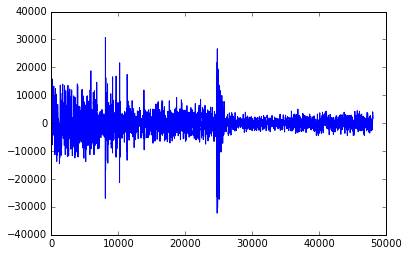

In [35]:
b = rawDataset[names[9]][1810000:1858000,0]
time = 1/48000*np.linspace(1,len(b),len(b))
plt.plot(b)

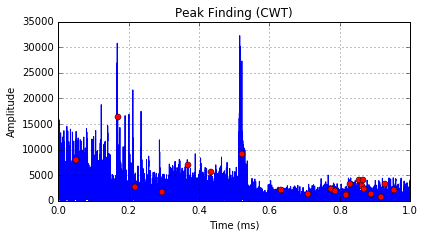

In [40]:
widths = np.linspace(1,12,60)
dist = np.zeros(len(b))

peakInd = signal.find_peaks_cwt(abs(b),widths,
                                noise_perc=1,
                                min_length=40,
                                max_distances=dist,
                                gap_thresh=5)

fig = plt.figure(figsize= (6,6))
plt.subplot(2,1,2)
plt.plot(time,abs(b),'b')
plt.plot(time[peakInd],abs(b[peakInd]),'ro')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Peak Finding (CWT)')
#plt.xlim((0,300))
#plt.ylim((0,20000))
plt.grid()

fig.tight_layout() 